## Insurance Claims- Fraud Detection
Problem Statement:

Business case:
Insurance fraud is a huge problem in the industry. It's difficult to identify fraud claims. Machine Learning is in a unique position to help the Auto Insurance industry with this problem.

In this project, you are provided a dataset which has the details of the insurance policy along with the customer details. It also has the details of the accident on the basis of which the claims have been made. 

In this example, you will be working with some auto insurance data to demonstrate how you can create a predictive model that predicts if an insurance claim is fraudulent or not. 

In [50]:
#Importing required libraries

#importing warnings
import warnings
warnings.filterwarnings("ignore")

# ************** DATA MANIPULATION *****************

#importing pandas and numpy
import pandas as pd
import numpy as np

# ************** DATA VISUALIZATION ****************

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.linear_model import LogisticRegression 

# ************* METRICS ****************************

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, roc_auc_score

In [51]:
#importing the dataset using read_csv
df = pd.read_csv("Automobile_insurance_fraud.csv")
df

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,...,?,87200,17440,8720,61040,Honda,Accord,2006,N,NaN
996,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,...,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N,NaN
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,...,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,NaN
998,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,...,YES,46980,5220,5220,36540,Audi,A5,1998,N,NaN


By looking at the dataset and problem statement, I can say that fraud_reported is my target column.
Also, target column data looks categorical. So I can conclude that this project is a **Classification problem**.

## EDA

In [52]:
#Checking shape
df.shape

(1000, 40)

Our dataset has 1000 rows and 40 columns

In [53]:
#Checking missing values
df.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

I see all 1000 values are missing values in _c39. Hence I can drop that. 

In [54]:
#drop _c39
df = df.drop(["_c39"],axis=1)

Succesfully dropped _c39

In [55]:
#Checking all the column names and assigning it to variable col
col = df.columns
col

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported'],
      dtype='object')

These are my feature/column names

### Dataset Description
   Input features:
       
    Age               
    Workclass         
    Fnlwgt            
    Education         
    Education_num     
    Marital_status    
    Occupation        
    Relationship      
    Race              
    Sex               
    Capital_gain      
    Capital_loss      
    Hours_per_week    
    Native_country    
                
       
----------------------------------------------------  
   Output feature:
- Income (Prediction task is to determine whether a person makes over 50K a year.)

In [56]:
#Checking for indexes of empty observation/space in all columns
for i in df.columns:
    space = df.loc[df[i] == " "]
    print(space)

Empty DataFrame
Columns: [months_as_customer, age, policy_number, policy_bind_date, policy_state, policy_csl, policy_deductable, policy_annual_premium, umbrella_limit, insured_zip, insured_sex, insured_education_level, insured_occupation, insured_hobbies, insured_relationship, capital-gains, capital-loss, incident_date, incident_type, collision_type, incident_severity, authorities_contacted, incident_state, incident_city, incident_location, incident_hour_of_the_day, number_of_vehicles_involved, property_damage, bodily_injuries, witnesses, police_report_available, total_claim_amount, injury_claim, property_claim, vehicle_claim, auto_make, auto_model, auto_year, fraud_reported]
Index: []

[0 rows x 39 columns]
Empty DataFrame
Columns: [months_as_customer, age, policy_number, policy_bind_date, policy_state, policy_csl, policy_deductable, policy_annual_premium, umbrella_limit, insured_zip, insured_sex, insured_education_level, insured_occupation, insured_hobbies, insured_relationship, capi

[0 rows x 39 columns]
Empty DataFrame
Columns: [months_as_customer, age, policy_number, policy_bind_date, policy_state, policy_csl, policy_deductable, policy_annual_premium, umbrella_limit, insured_zip, insured_sex, insured_education_level, insured_occupation, insured_hobbies, insured_relationship, capital-gains, capital-loss, incident_date, incident_type, collision_type, incident_severity, authorities_contacted, incident_state, incident_city, incident_location, incident_hour_of_the_day, number_of_vehicles_involved, property_damage, bodily_injuries, witnesses, police_report_available, total_claim_amount, injury_claim, property_claim, vehicle_claim, auto_make, auto_model, auto_year, fraud_reported]
Index: []

[0 rows x 39 columns]
Empty DataFrame
Columns: [months_as_customer, age, policy_number, policy_bind_date, policy_state, policy_csl, policy_deductable, policy_annual_premium, umbrella_limit, insured_zip, insured_sex, insured_education_level, insured_occupation, insured_hobbies, insu

I can see there are no empty observations in dataset

In [57]:
#Lets check the value count of each column to see if there are any unexpected and unwanted entries present in the column.
for i in df.columns:
        print(df[i].value_counts())
        print('*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*')

194    8
285    7
140    7
230    7
128    7
      ..
347    1
113    1
337    1
117    1
0      1
Name: months_as_customer, Length: 391, dtype: int64
*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
43    49
39    48
41    45
34    44
30    42
31    42
38    42
37    41
33    39
32    38
40    38
29    35
46    33
35    32
36    32
42    32
44    32
28    30
45    26
26    26
48    25
47    24
27    24
57    16
25    14
49    14
55    14
50    13
53    13
61    10
24    10
54    10
60     9
51     9
58     8
56     8
23     7
21     6
59     5
62     4
52     4
64     2
63     2
22     1
20     1
19     1
Name: age, dtype: int64
*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
116735    1
107181    1
430794    1
115399    1
328387    1
         ..
218456    1
179538    1
357713    1
247116    1
296960    1
Name: policy_number, Length: 1000, dtype: int64
*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
01-01-2006    3
28-04-1992    3
05-08-1992    3
07-11-1997    2
28-01-2010    2
             ..
24-09-200

I notice there are a lot of '?' values in collision_type, property_damage, police_report_available column. We will have to replace those values.

In [58]:
#treating ? values 
df = df.replace('?', np.nan) #converting ? to NAN
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 39 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

I can see that the columns collision_type, property_damage & police_report_available contains null values.

In [59]:
# column collision_type contains 178 null values.
# collison type column contain 3 classes namely Rear collision, side collision, front collision
# we will replace the null value with most common collision type hence I'll use mode.
df['collision_type'].fillna(df['collision_type'].mode()[0], inplace=True)

In [60]:
# property_damage column contains 360 null values.
# property damage column contains classes YES or NO.
# we can replace the null values with NO, assuming no property damage.
df['property_damage'].fillna('NO', inplace=True)

In [61]:
# column police report available contains 343 values.
# police_report_available contains classes YES or NO.
# we can replace the null values with NO, assuming there is NO police_report_available.
df['police_report_available'].fillna('NO', inplace=True)

In [62]:
df.isnull().sum()

months_as_customer             0
age                            0
policy_number                  0
policy_bind_date               0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_date                  0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_location              0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_rep

I've succeffully treated all NANs

In [63]:
#Checking unique values
df.nunique()

months_as_customer              391
age                              46
policy_number                  1000
policy_bind_date                951
policy_state                      3
policy_csl                        3
policy_deductable                 3
policy_annual_premium           991
umbrella_limit                   11
insured_zip                     995
insured_sex                       2
insured_education_level           7
insured_occupation               14
insured_hobbies                  20
insured_relationship              6
capital-gains                   338
capital-loss                    354
incident_date                    60
incident_type                     4
collision_type                    3
incident_severity                 4
authorities_contacted             5
incident_state                    7
incident_city                     7
incident_location              1000
incident_hour_of_the_day         24
number_of_vehicles_involved       4
property_damage             

I see policy_number, insured_zip & incident_location with all unique values, hence I will drop these.

In [64]:
#Dropping mentioned columns
df = df.drop(['policy_number','insured_zip','incident_location'], axis=1)

In [65]:
#Checking data type of columns
df.dtypes

months_as_customer               int64
age                              int64
policy_bind_date                object
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_date                   object
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_hour_of_the_day         int64
number_of_vehicles_involved      int64
property_damage                 object
bodily_injuries          

Here, policy_bind_date & incident_date shows object values. So I need to convert it to date type.

## EDA

In [66]:
#Let's convert policy_bind_date to date type

df['policy_bind_date'] = pd.to_datetime(df['policy_bind_date'], errors = 'coerce')

In [67]:
#now let's extract days, month and year from policy bind date
df['policy_bind_year'] = df['policy_bind_date'].dt.year
df['policy_bind_month'] = df['policy_bind_date'].dt.month
df['policy_bind_day'] = df['policy_bind_date'].dt.day

In [68]:
#Let's convert incident_date to date type
df['incident_date'] = pd.to_datetime(df['incident_date'], errors = 'coerce')

# extracting days and month from date
df['incident_month'] = df['incident_date'].dt.month
df['incident_day'] = df['incident_date'].dt.day

In [69]:
#Now I can drop the columns which are not required
df = df.drop(['policy_bind_date', 'incident_date'], axis=1)

In [25]:
df.nunique()

months_as_customer             391
age                             46
policy_state                     3
policy_csl                       3
policy_deductable                3
policy_annual_premium          991
umbrella_limit                  11
insured_zip                    995
insured_sex                      2
insured_education_level          7
insured_occupation              14
insured_hobbies                 20
insured_relationship             6
capital-gains                  338
capital-loss                   354
incident_type                    4
collision_type                   3
incident_severity                4
authorities_contacted            5
incident_state                   7
incident_city                    7
incident_hour_of_the_day        24
number_of_vehicles_involved      4
property_damage                  2
bodily_injuries                  3
witnesses                        4
police_report_available          2
total_claim_amount             763
injury_claim        

<AxesSubplot:xlabel='Income', ylabel='count'>

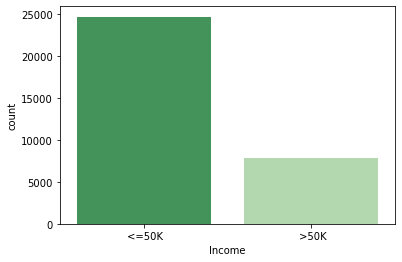

In [91]:
#Analysing our target variable 
sns.countplot(df["Income"],palette="Greens_r")

In the EDA Section, I wanted to start by analysing our target variable first. We have come across a very obvious observation!
- The number of people earning more than 50K dollars a year is one third of the people earning less than it.
- Also, I see class imbalance which I will treat later.

<AxesSubplot:xlabel='Age', ylabel='count'>

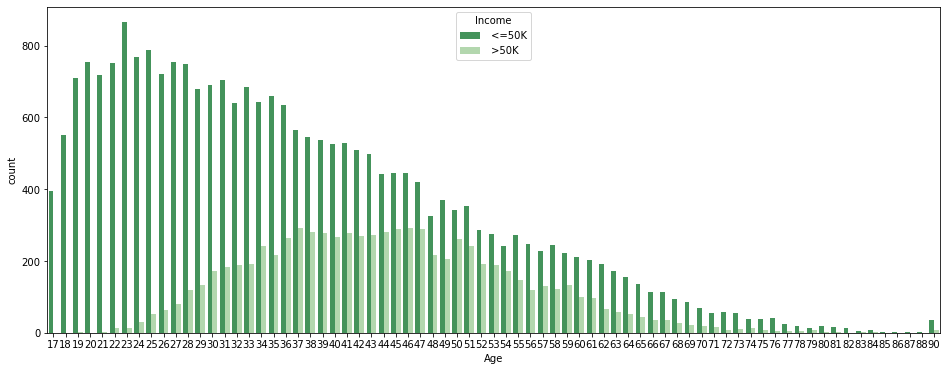

In [92]:
#Checking Income of Individuals of Different Age
plt.figure(figsize=(16,6))
sns.countplot(df["Age"],hue=df["Income"],palette="Greens_r", orient ="v")

We make an interesting observation over here. We see that people earning more than 50K dollars increase as the age increases upto a certain extent.

As one might imagine, the number of people earning more than 50K is quite negligible amongst people of age group 19-30.
For the people of age group 41-50 and 51-60, the number of people earning more than 50K is quite comparable to those earning less than it.

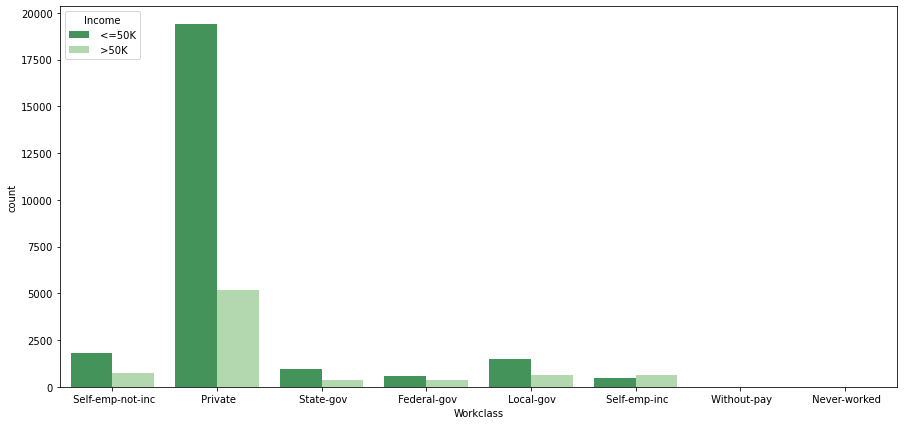

In [93]:
#Checking Income of Individuals of Different Working CLasses
plt.figure(figsize=(15,7))
sns.countplot(df["Workclass"],hue=df["Income"],palette="Greens_r")
plt.show()

In the above graph, we have segregated the incomes of adults on the basis of their different working classes.
- It is quite interesting to see that Self-Employed is the only category where the number of people who earn more than 50K dollars exceed those earning less than it! It might be conducive to suggest that when you handle your own business, start-up, etc. you are more likely to earn better if it gets successful!
- People working in the Private Sector face a significant difference between their pays where more than 75% of them earn less than 50K dollars an year!
- There is a very minute difference between the number of people whose income is more or less than 50K dollars an year who work for the Federal Govt.
- People belonging to the category Without-Pay and Never-Worked hardly contain any data in both the categories.

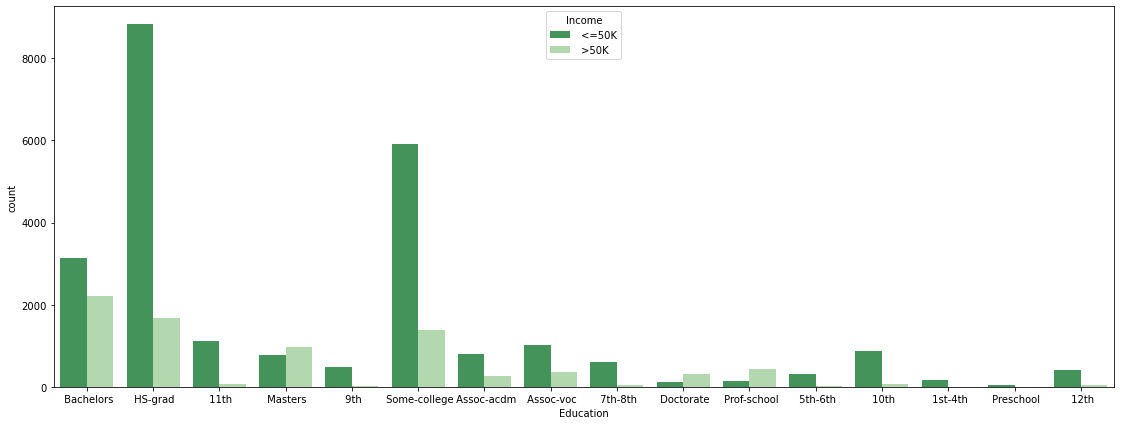

In [94]:
#checking Income of Individuals of Different Education Levels
plt.figure(figsize=(19,7))
sns.countplot(df["Education"],hue=df["Income"],palette="Greens_r")
plt.show()

We can draw a few insightful conclusions from this graph.

- For the people who have completed their education up till 12th Standard, there are just a handful of them who earn more than 50K dollars a year. Most of the people end up earning below 50K.
- For the people belonging to Bachelors, Masters, Doctorate, Prof-school category in the education level, there are more number of people who are earning greater than 50K dollars an year than the number of people earning less than it.
- In case of Assoc-acad or Assoc-voc, there are a few people who earn more than 50K dollars a year.

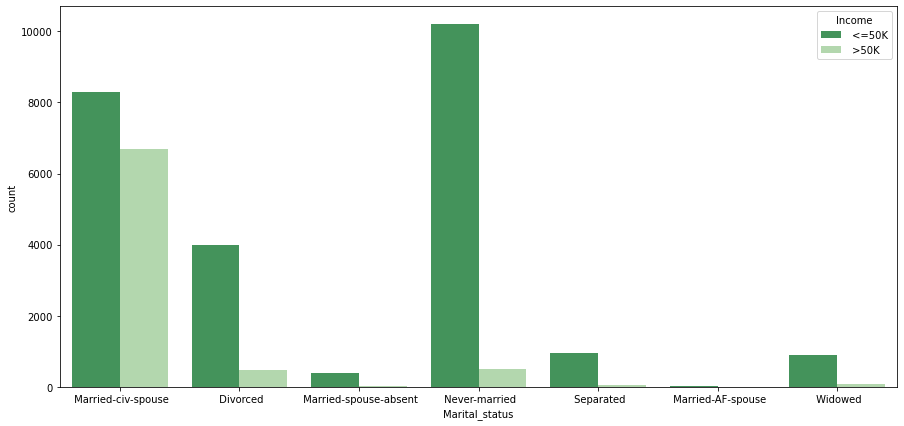

In [95]:
#checking Income of Individuals with Different Marital status
plt.figure(figsize=(15,7))
sns.countplot(df["Marital_status"],hue=df["Income"],palette="Greens_r")
plt.show()

One thing to note here is that Married-civ-spouse is the only category which has comparable number of people belonging to both categories.

For others, there are less than 25% of the adults earning more than 50K dollars an year.

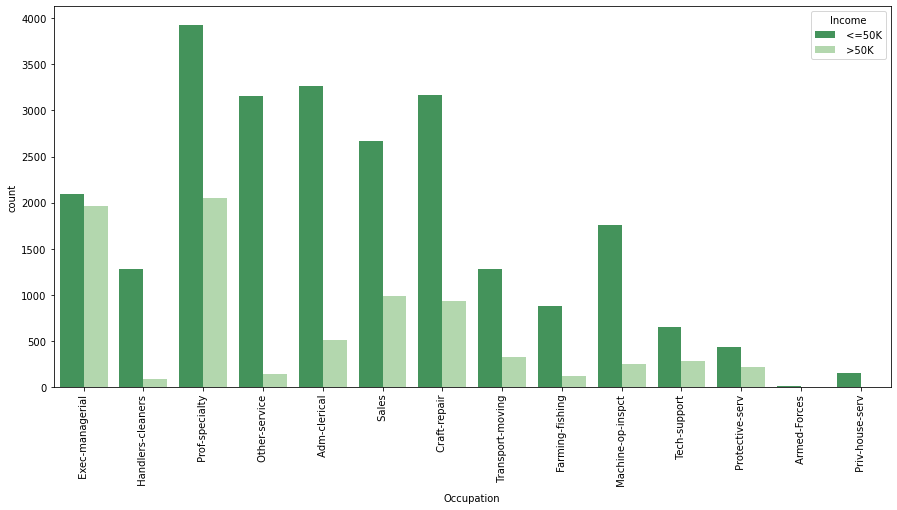

In [96]:
#checking Income of Individuals of Different Occupations
plt.figure(figsize=(15,7))
sns.countplot(df["Occupation"],hue=df["Income"],palette="Greens_r")
plt.xticks(rotation = 90)
plt.show()

A few points to note over here:-

- Adults in Exec-managerial role are equally likely to earn more than 50K dollars an year.
- There's close to 33% probablity for an adult in Prof-specialty to earn more than 50K dollars an year.
- Adults working in Farming-fishing, Machine-op-inspect, Other-service, Adm-clerical, Transport-moving are very less likely to earn more than 50K dollars an year.
- Around 25% of the people working in Sales earn more than 50K dollars an year.

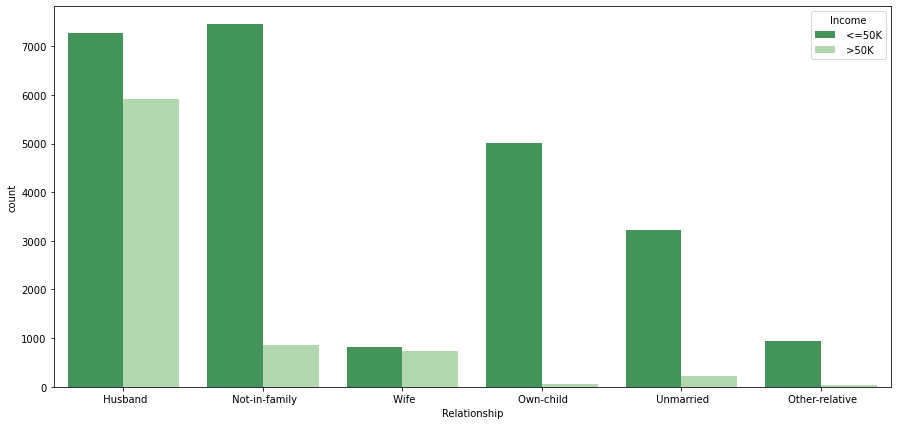

In [97]:
#checking Income of Individuals of Different Relationship
plt.figure(figsize=(15,7))
sns.countplot(df["Relationship"],hue=df["Income"],palette="Greens_r")
#plt.xticks(rotation = 90)
plt.show()

- Wives are equally likely to earn more than 50K dollars an year.
- For Husbands, although significant, there is less possibility of them to earn more than 50K dollars an year.
- There are just a handful of Not-in-family, Own-child, Other-relative & Unmarried people earning more than 50K dollars an year.

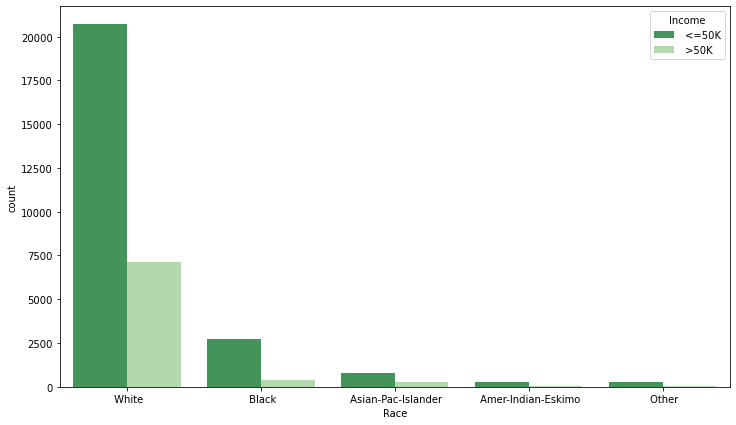

In [98]:
#checking Income of Individuals of Different Race
plt.figure(figsize=(12,7))
sns.countplot(df["Race"],hue=df["Income"],palette="Greens_r")
plt.show()

An important point to notice over here is that, except Whites there are very few people of different races.

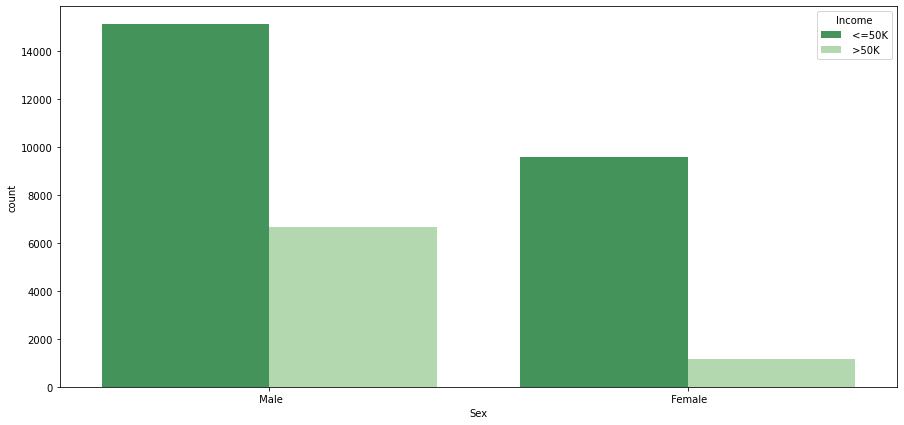

In [99]:
#checking Income of Individuals of Different Sex
plt.figure(figsize=(15,7))
sns.countplot(df["Sex"],hue=df["Income"],palette="Greens_r")
plt.show()

We can see a significant gap in the earnings between males and females over here.

- For Females, there are less than 10% of the adults earning more than 50K dollars an year.
- In case of Males there are close to 33% of them earning more than 50K dollars an year.

### Bivariate Analysis

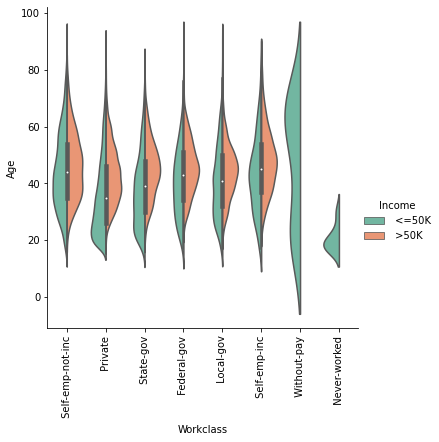

In [100]:
# Let's plot catplot for Workclass and Age
sns.catplot(x = "Workclass", y = "Age", hue = "Income", kind = "violin", data=df, split=True,palette='Set2')
plt.xticks(rotation=90);

All the Workclass has chances of getting income >50k except Without-pay and Never-worked.Which means if a person is working then there is a chance that he gets income of >50k.But if he is not at all working then obviously he'll not get that income.

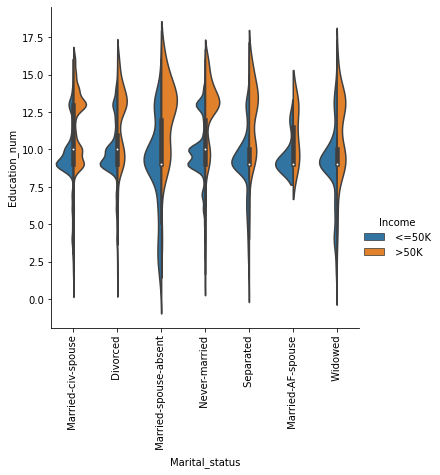

In [101]:
# Let's plot catplot for Marital_status and Education_num
sns.catplot(x = "Marital_status", y = "Education_num", hue = "Income", kind = "violin", data=df, split=True)
plt.xticks(rotation=90);

If the education number is high then obviously Income is high, but for married-spouse-absent is showing high education_num.

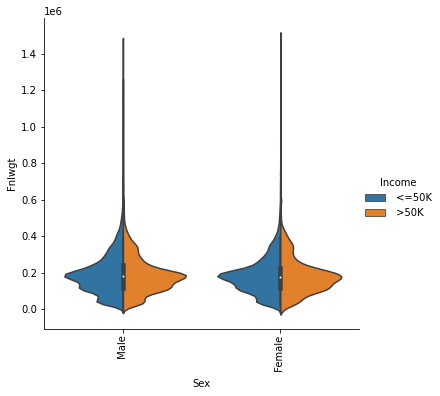

In [102]:
# Let's plot catplot for Sex and Fnlwgt
sns.catplot(x = "Sex", y = "Fnlwgt", hue = "Income", kind = "violin", data=df, split=True)
plt.xticks(rotation=90);

Both for male and female the Fnlwgt is same and they have same income also.

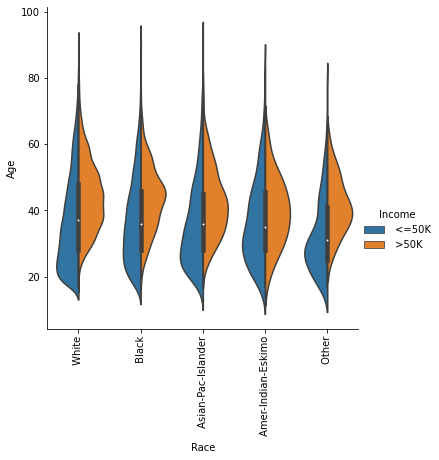

In [103]:
# Let's plot catplot for Race and Age
sns.catplot(x = "Race", y = "Age", hue = "Income", kind = "violin", data=df, split=True)
plt.xticks(rotation=90);

Chances of getting income >50k is more in case of Whites.That means in US white peoples are dominating.

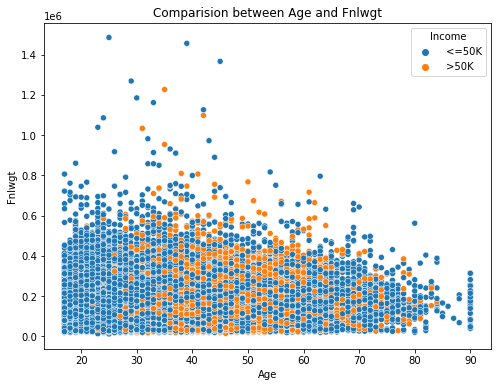

In [104]:
#Comparision between features using scatter plot
plt.figure(figsize=[8,6])
plt.title('Comparision between Age and Fnlwgt')
sns.scatterplot(df['Age'],df['Fnlwgt'],hue=df["Income"]);


As the age of the worker increses there is less chance to get more income,And also as the Fnlgwt increases then the chance to get income is decreaseing.

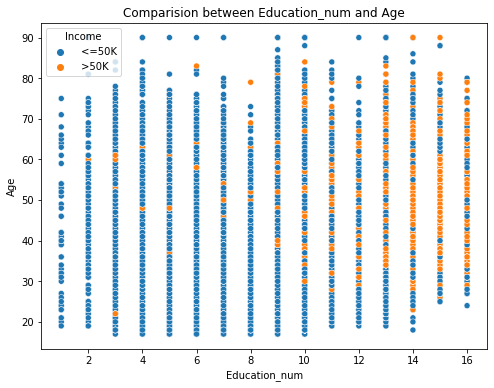

In [105]:
#Comparision between features using scatter plot
plt.figure(figsize=[8,6])
plt.title('Comparision between Education_num and Age')
sns.scatterplot(df['Education_num'],df['Age'],hue=df["Income"]);

People with age above 70 has less chance of getting work and As the education number increases then the chance of getting income>50k is also high.

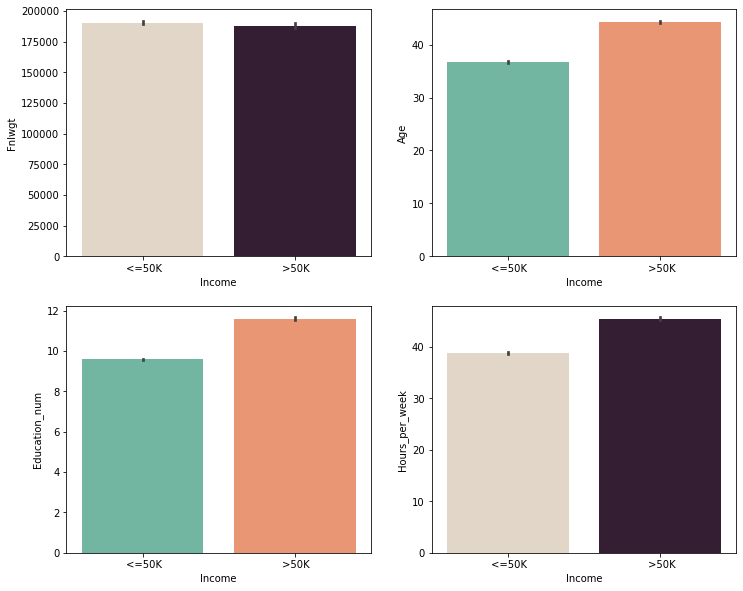

In [106]:
#Using barplot to compare feature with target
fig,axes=plt.subplots(2,2,figsize=(12,10))

# Checking income with Fnlwgt
sns.barplot(x='Income',y='Fnlwgt',ax=axes[0,0],data=df,palette='ch:.25')

# Checking income with Capital_gain
sns.barplot(x='Income',y='Age',ax=axes[0,1],data=df,palette='Set2')

# Checking income with Capital_loss
sns.barplot(x='Income',y='Education_num',ax=axes[1,0],data=df,palette='Set2')

# Checking income with Hours_per_week
sns.barplot(x='Income',y='Hours_per_week',ax=axes[1,1],data=df,palette='ch:.25')
plt.show()

- With Fnlwgt the chance of getting income >50k and <=50k both are almost equal.
- With Age the chance of getting >50k is high compared to chance of getting income <=50k.
- With Education_num the chance of getting income >50k is very high than <=50k.
- With hours_per_week also the chance of getting income >50k is high.

#### Encoding target column

In [70]:
#Encoding my target so that I can check the correlation with numerical columns
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['fraud_reported']=le.fit_transform(df['fraud_reported'])

In [71]:
df.fraud_reported.value_counts()

0    753
1    247
Name: fraud_reported, dtype: int64

The target values are encoded now. 

## Multi-variate Analysis

In [72]:
#describing the dataset
df.describe()

,months_as_customer,age,policy_deductable,policy_annual_premium,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,...,injury_claim,property_claim,vehicle_claim,auto_year,fraud_reported,policy_bind_year,policy_bind_month,policy_bind_day,incident_month,incident_day
count,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,203.954000,38.948000,1136.000000,1256.406150,1.101000e+06,25126.100000,-26793.700000,11.644000,1.83900,0.992000,...,7433.420000,7399.570000,37928.950000,2005.103000,0.247000,2001.604000,6.559000,15.448000,3.407000,13.08400
std,115.113174,9.140287,611.864673,244.167395,2.297407e+06,27872.187708,28104.096686,6.951373,1.01888,0.820127,...,4880.951853,4824.726179,18886.252893,6.015861,0.431483,7.360391,3.391758,8.850176,3.276291,10.44318
min,0.000000,19.000000,500.000000,433.330000,-1.000000e+06,0.000000,-111100.000000,0.000000,1.00000,0.000000,...,0.000000,0.000000,70.000000,1995.000000,0.000000,1990.000000,1.000000,1.000000,1.000000,1.00000
25%,115.750000,32.000000,500.000000,1089.607500,0.000000e+00,0.000000,-51500.000000,6.000000,1.00000,0.000000,...,4295.000000,4445.000000,30292.500000,2000.000000,0.000000,1995.000000,4.000000,8.000000,1.000000,2.00000
50%,199.500000,38.000000,1000.000000,1257.200000,0.000000e+00,0.000000,-23250.000000,12.000000,1.00000,1.000000,...,6775.000000,6750.000000,42100.000000,2005.000000,0.000000,2002.000000,7.000000,16.000000,2.000000,15.00000
75%,276.250000,44.000000,2000.000000,1415.695000,0.000000e+00,51025.000000,0.000000,17.000000,3.00000,2.000000,...,11305.000000,10885.000000,50822.500000,2010.000000,0.000000,2008.000000,9.000000,23.000000,5.000000,22.00000
max,479.000000,64.000000,2000.000000,2047.590000,1.000000e+07,100500.000000,0.000000,23.000000,4.00000,2.000000,...,21450.000000,23670.000000,79560.000000,2015.000000,1.000000,2015.000000,12.000000,31.000000,12.000000,31.00000


Observation:
- The minimum and maximum age of people in the dataset is 19 and 64 years respectively, while the average age is 38.
- Most frequent incident hour of day is around 12.
- Number of vehicles involved ranges from 1 to 4
- Injury claim was made from 0 to 21450 rs.
- property claim was made from 0 to 23670 rs.
- Vehicle claim was made from 0 to 79560 rs.

<AxesSubplot:>

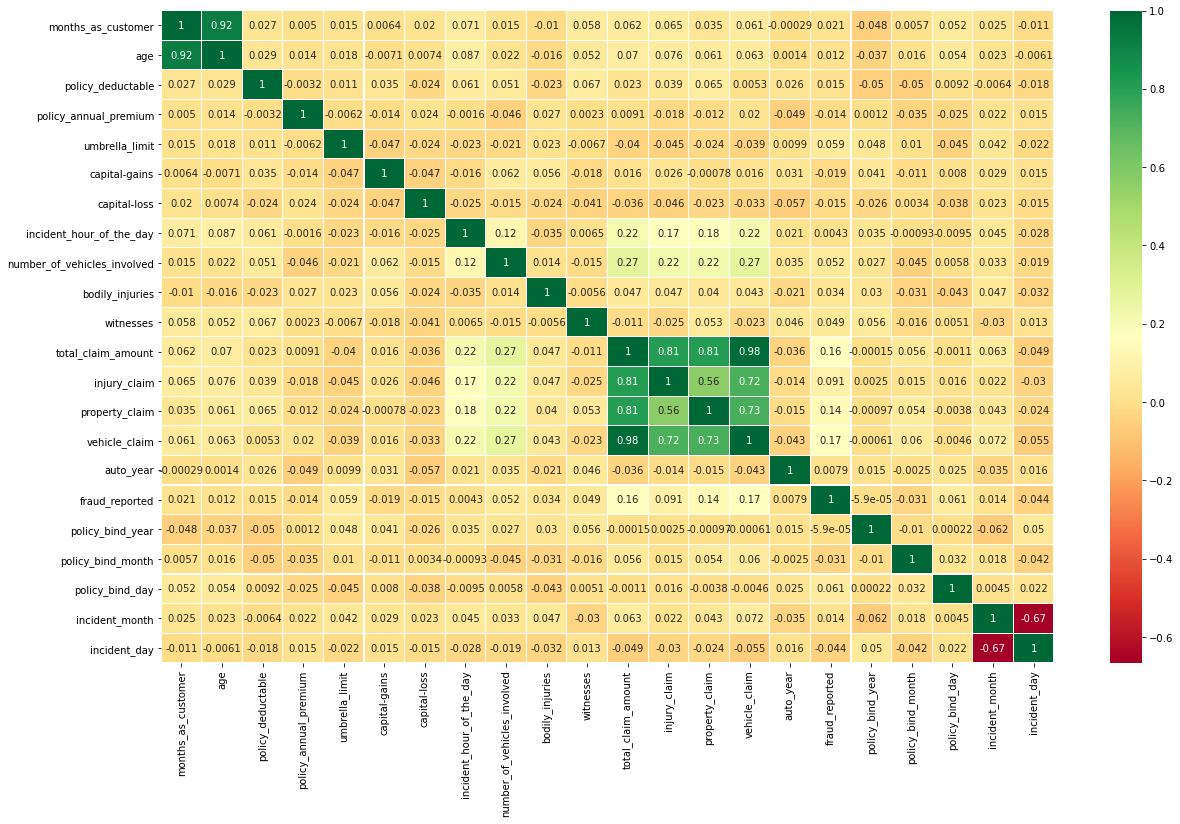

In [73]:
#Plotting heatmap with all features
plt.figure(figsize=(20,12))
sns.heatmap(df.corr(),linewidths=.1,annot=True, annot_kws={"size": 10}, cmap="RdYlGn")

Here, we have tried to plot a correlation map in order to see whether or not the independent features are related to the dependent features.

    We see that most of the features doesn't show much relationship with target Variable.
    Total claim amount is highly correlated with injury, property & vehicle claim amount.
    An important thing to note over here is that, we have not covered the object datatypes in this correlation graph.

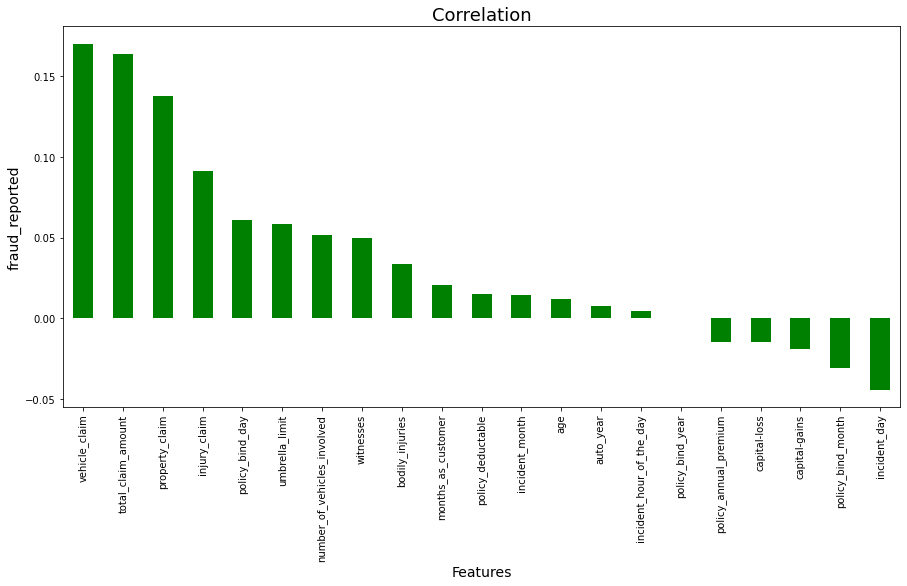

In [74]:
#Visualizing correlation of target variable using bar plot
plt.figure(figsize=(15,7))
df.corr()['fraud_reported'].sort_values(ascending=False).drop(['fraud_reported']).plot(kind='bar',color='g')
plt.xlabel('Features',fontsize=14)
plt.ylabel('fraud_reported',fontsize=14)
plt.title('Correlation',fontsize=18)
plt.show()

I notice that most of the numerical features are positively correlated.
- vehicle claim shows greater correlation than other features.
- policy bind year shows no relation with target.

<Figure size 432x288 with 0 Axes>

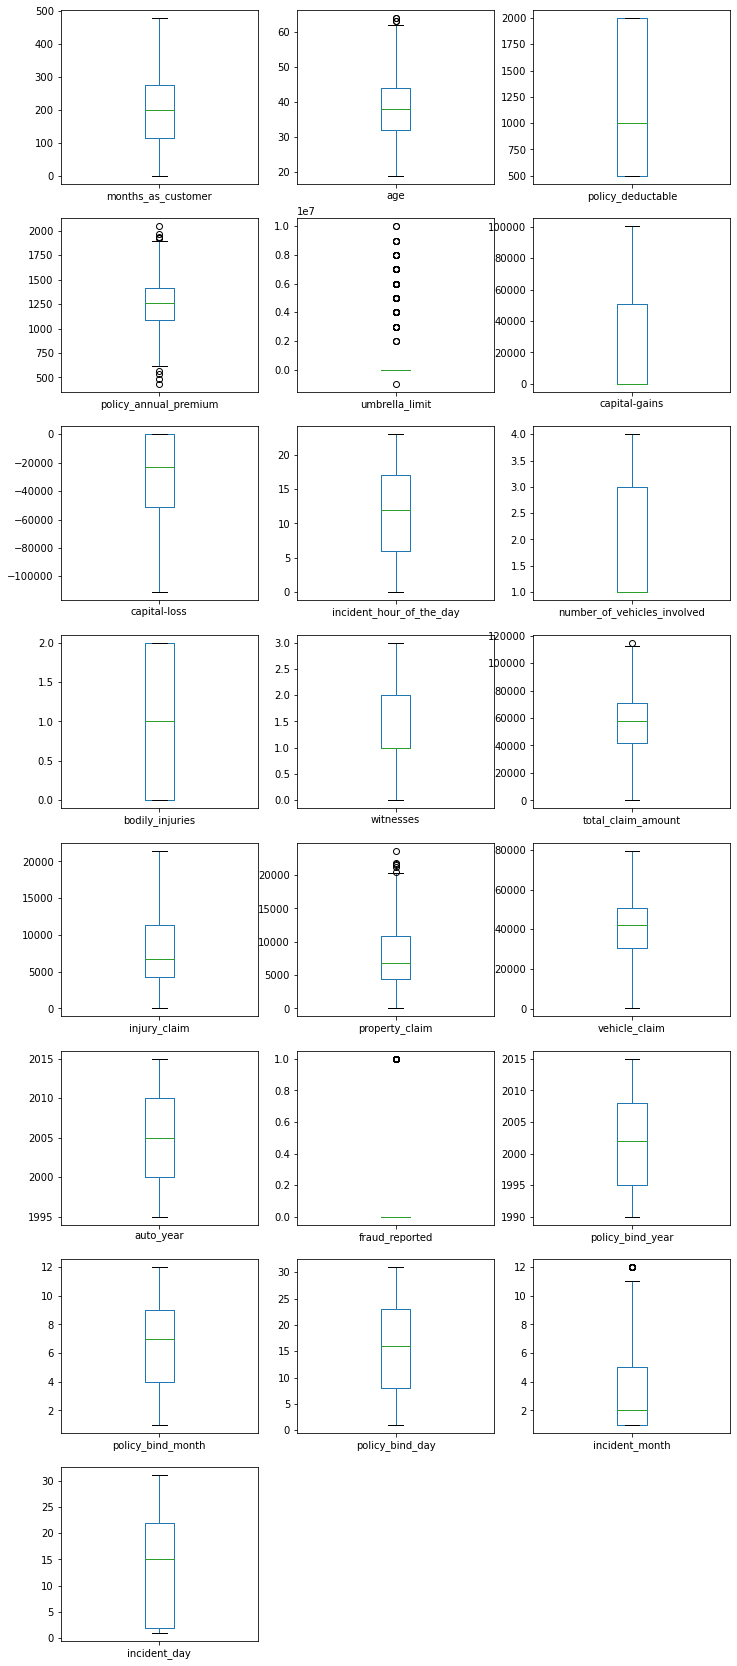

In [75]:
#Checking skewness with boxplot
plt.figure()
df.plot(kind="box",subplots=True,layout=(8,3),figsize=(12,30))
plt.show()

In [76]:
df.columns[df.dtypes != "object"]

Index(['months_as_customer', 'age', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'capital-gains',
       'capital-loss', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'bodily_injuries', 'witnesses',
       'total_claim_amount', 'injury_claim', 'property_claim', 'vehicle_claim',
       'auto_year', 'fraud_reported', 'policy_bind_year', 'policy_bind_month',
       'policy_bind_day', 'incident_month', 'incident_day'],
      dtype='object')

As observed from boxplot, there are outliers present in numeric columns and I need to remove this. 

    'age' - Continuous
    'policy_annual_premium' - Continuous
    'umbrella_limit' - Categorical - No need to remove outiers.
    'total_claim_amount' - Continuous
    'property_claim' - Continuous
    'incident_month' - Categorical - No need to remove outiers.

## Data cleaning

### Treating Outliers

##### Zscore:

In [77]:
#Making a variable as dfContCols and listing all columns with outliers.
dfContCols = df[['age','policy_annual_premium','total_claim_amount','property_claim']]

In [78]:
#Using Zscore to remove outliers
from scipy.stats import zscore
ZS = np.abs(zscore(dfContCols))
df1 = df[(ZS<3).all(axis=1)]
df1.shape

(996, 39)

In [79]:
#previous shape
df.shape

(1000, 39)

I've succefully removed the outliers using zscore and rows in my new dataset are 996 whereas previously we had 1000 rows.

In [80]:
#Checking the data loss
((1000-996)/1000)*100

0.4

So I get data loss of 0.4% hence I'll proceed with zscore.

### Treating Skewness

In [81]:
#check skewness
df1.skew()

months_as_customer             0.359605
age                            0.474526
policy_deductable              0.473229
policy_annual_premium          0.032042
umbrella_limit                 1.800271
capital-gains                  0.478850
capital-loss                  -0.393015
incident_hour_of_the_day      -0.039123
number_of_vehicles_involved    0.500364
bodily_injuries                0.011117
witnesses                      0.025758
total_claim_amount            -0.593473
injury_claim                   0.267970
property_claim                 0.357130
vehicle_claim                 -0.619755
auto_year                     -0.049276
fraud_reported                 1.175133
policy_bind_year               0.058499
policy_bind_month             -0.029722
policy_bind_day                0.028923
incident_month                 1.377097
incident_day                   0.055659
dtype: float64

Keeping skewness range as +/-0.5 
I can see the skewness in:

    umbrella_limit - Categorical - No need to remove outiers. 
    total_claim_amount - Continuous
    vehicle_claim - Continuous
    fraud_reported - target - No need to remove outiers.
    incident_month - Categorical - No need to remove outiers. 

In [82]:
#Creating list of all the columns with skewness
cols=['total_claim_amount','vehicle_claim']

In [83]:
#Removing skewness using yeo-johnson
from sklearn.preprocessing import PowerTransformer
PT = PowerTransformer(method='yeo-johnson')

df1[cols] = PT.fit_transform(df1[cols].values)
df1.skew()

months_as_customer             0.359605
age                            0.474526
policy_deductable              0.473229
policy_annual_premium          0.032042
umbrella_limit                 1.800271
capital-gains                  0.478850
capital-loss                  -0.393015
incident_hour_of_the_day      -0.039123
number_of_vehicles_involved    0.500364
bodily_injuries                0.011117
witnesses                      0.025758
total_claim_amount            -0.508953
injury_claim                   0.267970
property_claim                 0.357130
vehicle_claim                 -0.521354
auto_year                     -0.049276
fraud_reported                 1.175133
policy_bind_year               0.058499
policy_bind_month             -0.029722
policy_bind_day                0.028923
incident_month                 1.377097
incident_day                   0.055659
dtype: float64

I can notice that skewness has been removed. Let me check the distribution. 

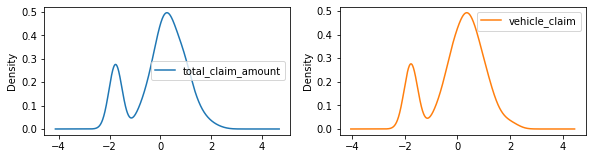

In [84]:
#Checking distribution with density graph
df1[cols].plot(kind="density",subplots=True,sharex=False,layout=(3,3),figsize=(15,8))
plt.show()

My continuous features now looks normally distributed.

### Encoding

In [85]:
#Encoding all the categorical columns
from sklearn.preprocessing import LabelEncoder

categorical_columns = df1.columns[df1.dtypes == "object"]

In [86]:
categorical_columns

Index(['policy_state', 'policy_csl', 'insured_sex', 'insured_education_level',
       'insured_occupation', 'insured_hobbies', 'insured_relationship',
       'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'property_damage', 'police_report_available', 'auto_make',
       'auto_model'],
      dtype='object')

In [87]:
label_encoder = LabelEncoder()

for column in categorical_columns:
    df1[column] = label_encoder.fit_transform(df1[column])   #.astype(str) will embed all values in str type

In [88]:
#checking the columns and its type after encoding
df1[categorical_columns]

,policy_state,policy_csl,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,property_damage,police_report_available,auto_make,auto_model
0,2,1,1,4,2,17,0,2,2,0,4,4,1,1,1,10,1
1,1,1,1,4,6,15,2,3,1,1,4,5,5,0,0,8,12
2,2,0,0,6,11,2,3,0,1,1,4,1,1,0,0,4,30
3,0,1,0,6,1,2,4,2,0,0,4,2,0,0,0,3,34
4,0,2,1,0,11,2,4,3,1,1,2,1,0,0,0,0,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2,2,0,5,2,13,4,2,0,1,1,0,4,1,0,6,6
996,0,0,0,6,9,17,5,2,1,0,1,4,3,1,0,13,28
997,2,1,0,5,1,3,2,0,2,1,4,0,0,0,1,11,19
998,0,2,1,0,5,0,5,2,1,0,3,1,0,0,1,1,5


I've successfully encoded all the categorical columns

### Splitting independent & target variable

In [89]:
X = df1.drop("fraud_reported",axis=1)
y = df1["fraud_reported"]

### Treating class imbalance

In [90]:
#Treating Class imbalance in target
from imblearn.over_sampling import SMOTE
SM=SMOTE()
X, y=SM.fit_resample(X, y)
y.value_counts()

1    750
0    750
Name: fraud_reported, dtype: int64

I can see that the target column was balanced using SMOTE

### SCALING

In [91]:
#importing necessary libraries
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import accuracy_score            #using accuracy_score as this is categorical data
from sklearn.model_selection import train_test_split, cross_val_score

In [92]:
#Using StandardScaler to scale the independent variables
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns = X.columns)

In [93]:
X

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,...,property_claim,vehicle_claim,auto_make,auto_model,auto_year,policy_bind_year,policy_bind_month,policy_bind_day,incident_month,incident_day
0,1.108839,1.031725,1.381682,0.227238,-0.241500,0.649319,-0.489643,1.240190,0.644980,-1.210805,...,1.164126,0.730969,0.998067,-1.742555,-0.164808,1.806192,1.129770,0.159732,-0.748280,1.240902
1,0.195788,0.339860,0.121790,0.227238,1.463204,-0.269404,1.650112,1.240190,0.644980,-0.149781,...,-1.523340,-2.093344,0.469803,-0.692440,0.361922,0.649489,-0.115842,1.349986,-0.748280,0.835378
2,-0.662479,-1.159182,1.381682,-1.073742,1.463204,0.676615,1.650112,-0.806328,1.730806,1.176498,...,-0.849278,-1.019429,-0.586725,1.025931,0.361922,-0.218039,-0.115842,-0.792471,-0.427680,0.936759
3,0.451443,0.224549,-1.138103,0.227238,1.463204,0.688006,2.078064,-0.806328,1.730806,-1.476060,...,-0.302563,0.646386,-0.850858,1.407791,1.590959,-1.663918,-0.427245,1.111935,2.137119,-1.192239
4,0.195788,0.570481,-1.138103,1.528218,-0.241500,1.424816,2.078064,1.240190,-1.526671,1.176498,...,-1.551883,-2.041518,-1.643254,1.121396,0.713076,1.806192,-0.115842,-1.149547,-0.427680,0.429855
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,-1.347267,-1.274493,0.121790,-1.073742,1.164880,-0.228489,-0.489643,-0.806328,-0.983758,-0.945549,...,-0.686581,-0.270315,0.205671,0.739536,0.361922,0.794077,0.506964,0.516808,2.457719,-1.192239
1496,-0.826828,-1.159182,-1.138103,-1.073742,0.571644,1.495105,-0.489643,1.240190,0.102068,0.645986,...,0.004607,0.874557,1.790463,0.548606,0.713076,0.649489,-0.738648,-0.435395,-0.107080,-1.192239
1497,-1.685095,-1.274493,0.121790,-1.073742,1.277391,1.270912,-0.489643,-0.806328,-1.526671,-1.210805,...,1.191791,0.355415,-1.379122,-1.360695,1.239806,-0.073451,-0.115842,0.516808,-0.748280,0.125712
1498,2.031020,2.069522,1.381682,0.227238,1.463204,0.695774,1.650112,1.240190,1.730806,1.176498,...,-0.373921,0.115831,-1.114990,1.503256,-1.393845,0.071137,-0.738648,1.588037,1.816519,-1.192239


The data looks scaled now. 

### FIND BEST random_state 

In [94]:
from sklearn.linear_model import LogisticRegression
maxAccu=0
maxRS=0
for i in range(1,200):
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.30, random_state =i)
    mod = LogisticRegression()
    mod.fit(X_train, y_train)
    pred = mod.predict(X_test)
    acc=accuracy_score(y_test, pred)    #We used accuracy_score as this is classification problem
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is ",maxAccu," on Random_state ",maxRS)

Best accuracy is  0.84  on Random_state  93


In [95]:
#Splitting the dataset for training and testing and using best random state.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = maxRS)

### Algorithms

In [96]:
#Creating a function to display the result/evaluation for each model

from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score

def evaluate(model, X_train, X_test, y_train, y_test):
    y_test_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)

    print("TESTING RESULTS: \n-------------------")
    print(f"ACCURACY SCORE: {accuracy_score(y_test, y_test_pred):.4f}")
    print(f"CROSS VALIDATION SCORE: {cross_val_score(model,X,y,cv=5).mean()}")
    clf_report = pd.DataFrame(classification_report(y_test, y_test_pred, output_dict=True))
    print(f"CONFUSION MATRIX:\n{confusion_matrix(y_test, y_test_pred)}")
    print(f"CLASSIFICATION REPORT:\n{clf_report}")

####  Logistic Regression

In [97]:
#Calling the models

#Logistic Regression
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)

evaluate(lr_clf, X_train, X_test, y_train, y_test)

TESTING RESULTS: 
-------------------
ACCURACY SCORE: 0.8400
CROSS VALIDATION SCORE: 0.7913333333333334
CONFUSION MATRIX:
[[179  32]
 [ 40 199]]
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.817352    0.861472      0.84    0.839412      0.840784
recall       0.848341    0.832636      0.84    0.840489      0.840000
f1-score     0.832558    0.846809      0.84    0.839683      0.840127
support    211.000000  239.000000      0.84  450.000000    450.000000


####  Random Forest Classifier

In [98]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier()
rf_clf.fit(X_train, y_train)
evaluate(rf_clf, X_train, X_test, y_train, y_test)

TESTING RESULTS: 
-------------------
ACCURACY SCORE: 0.8978
CROSS VALIDATION SCORE: 0.8566666666666667
CONFUSION MATRIX:
[[193  18]
 [ 28 211]]
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.873303    0.921397  0.897778    0.897350      0.898847
recall       0.914692    0.882845  0.897778    0.898769      0.897778
f1-score     0.893519    0.901709  0.897778    0.897614      0.897869
support    211.000000  239.000000  0.897778  450.000000    450.000000


#### Support Vector Machine

In [99]:
from sklearn.svm import SVC

svm_clf = SVC(kernel='linear')
svm_clf.fit(X_train, y_train)

evaluate(svm_clf, X_train, X_test, y_train, y_test)

TESTING RESULTS: 
-------------------
ACCURACY SCORE: 0.8333
CROSS VALIDATION SCORE: 0.7946666666666666
CONFUSION MATRIX:
[[180  31]
 [ 44 195]]
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.803571    0.862832  0.833333    0.833202      0.835045
recall       0.853081    0.815900  0.833333    0.834490      0.833333
f1-score     0.827586    0.838710  0.833333    0.833148      0.833494
support    211.000000  239.000000  0.833333  450.000000    450.000000


#### AdaBoost

In [100]:
from sklearn.ensemble import AdaBoostClassifier

ab_clf = AdaBoostClassifier()
ab_clf.fit(X_train, y_train)

evaluate(ab_clf, X_train, X_test, y_train, y_test)

TESTING RESULTS: 
-------------------
ACCURACY SCORE: 0.8533
CROSS VALIDATION SCORE: 0.8313333333333335
CONFUSION MATRIX:
[[182  29]
 [ 37 202]]
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.831050    0.874459  0.853333    0.852755      0.854105
recall       0.862559    0.845188  0.853333    0.853874      0.853333
f1-score     0.846512    0.859574  0.853333    0.853043      0.853449
support    211.000000  239.000000  0.853333  450.000000    450.000000


I got the accuracy_score & cross validation scores of all the algorithms
On checking the difference between accuracy_score & cross_val_score, I found that AdaBoostClassifier has least difference and best accuracy. Hence, I will tune this model.

## HYPERPARAMETER TUNING

In [101]:
#importing required library
from sklearn.model_selection import GridSearchCV

In [102]:
#RandomForestClassifier Tuning

#Creating RandomForestClassifier parameters dictionary

param_grid = {
             'n_estimators':[100,200,300],
             'learning_rate': [0.001,0.01,0.1,0.2,0.5]
}

In [104]:
#Create a GridSearchCV object and fit it to the training data
ab_hp = GridSearchCV(AdaBoostClassifier(),param_grid,refit=True)   #or cv=5
ab_hp.fit(X_train,y_train)
ab_hp.best_params_

{'learning_rate': 0.2, 'n_estimators': 300}

In [105]:
#Using the best parameters
final_mod = AdaBoostClassifier( n_estimators=300, learning_rate=0.2 )
final_mod.fit(X_train,y_train)
evaluate(final_mod, X_train, X_test, y_train, y_test)

TESTING RESULTS: 
-------------------
ACCURACY SCORE: 0.8889
CROSS VALIDATION SCORE: 0.8400000000000001
CONFUSION MATRIX:
[[189  22]
 [ 28 211]]
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.870968    0.905579  0.888889    0.888274      0.889350
recall       0.895735    0.882845  0.888889    0.889290      0.888889
f1-score     0.883178    0.894068  0.888889    0.888623      0.888961
support    211.000000  239.000000  0.888889  450.000000    450.000000


### After tuning, the accuracy increased to 88.89%

## ROC-AUC Curve

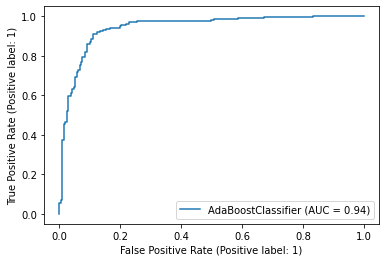

In [106]:
#Plotting ROC curve for the best model.
from sklearn.metrics import plot_roc_curve

plot_roc_curve(final_mod,X_test,y_test)

The AUC score of my final model(Adaboost) is 0.94

## SERIALIZATON (Saving model)

In [107]:
#Saving the model as .pkl file
import joblib
joblib.dump(final_mod ,"insurance_fraud.pkl")

['insurance_fraud.pkl']

### Done :)